# Aim

Finally design the vibration _controller_ instead of just the observer.

In [1]:
from controller import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-07, 20.792897309165465)

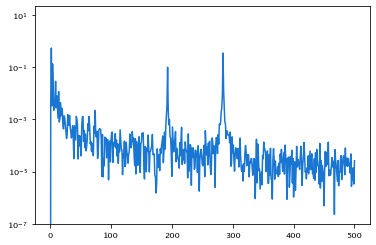

In [2]:
f, psd = signal.periodogram(truth[:1000], fs=f_sampling)
plt.semilogy(f, psd)
plt.ylim(1e-7)

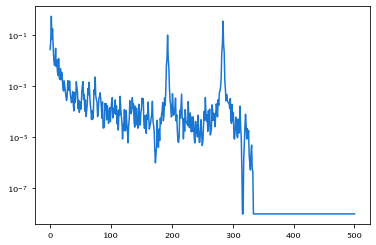

In [3]:
# our goal is to pick off those two peaks in closed loop!

plt.semilogy(f, noise_filter(psd))

In [4]:
params, variances = vibe_fit_freq(noise_filter(psd), N=2)

In [5]:
def get_squelch(psd):
    params, _ = vibe_fit_freq(noise_filter(psd), N=2)
    width = 10
    peaks = params[:,0]
    peaks = [int(p) for p in peaks]
    windows = np.zeros(len(peaks))
    for i, peak in enumerate(peaks):
        windows[i] = np.mean(psd[peak-width:peak+width])

    return psd[peaks]/windows
    # we want to bring the peaks down to their averages
    
get_squelch(psd)

array([18.19729702, 18.0369525 ])

In [6]:
controller = Controller('kalman', kfilter)

NameError: name 'kfilter' is not defined

In [ ]:
residuals, _, _ = controller.control(truth[:1000])

In [ ]:
_, psd_res = signal.periodogram(residuals, fs=f_sampling)
plt.semilogy(f, psd_res)
plt.ylim(1e-7)

In [ ]:
get_squelch(psd_res)

In [ ]:
squelches = np.log10(get_squelch(psd_res))
for i in range(controller.kfilter.state.size):
    if i % 2 == 0:
        controller.kfilter.state[i] *= np.log10(squelches[i // 2])

In [ ]:
residuals, _, _ = controller.control(truth[1000:2000])

In [ ]:
plt.semilogy(*signal.periodogram(residuals, fs=f_sampling))